In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crimes-2001-to-present/Crimes_-_2001_to_Present.csv


In [2]:
df_chicago = pd.read_csv("/kaggle/input/crimes-2001-to-present/Crimes_-_2001_to_Present.csv")

In [3]:
df_chicago.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [4]:
df_chicago.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,...,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


In [5]:
df_chicago.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

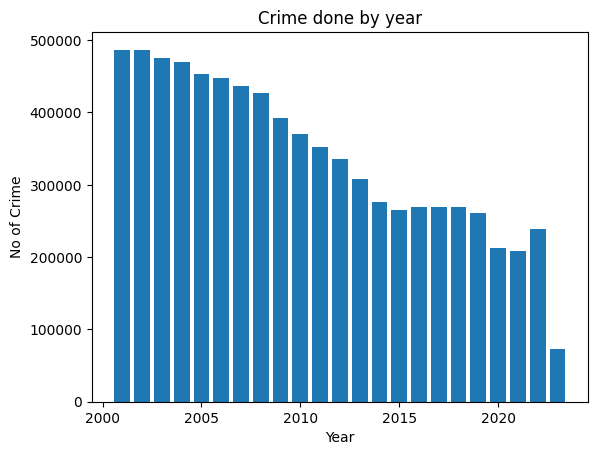

In [6]:
# Crime done by Year
lst_count = list(df_chicago.Year.value_counts())
lst_year = [2002,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016,2017,2018,2015,2019,2022,
           2020,2021,2023]
import matplotlib.pyplot as plt
plt.bar(lst_year,lst_count)
plt.xlabel("Year")
plt.ylabel("No of Crime")
plt.title("Crime done by year")
plt.show()

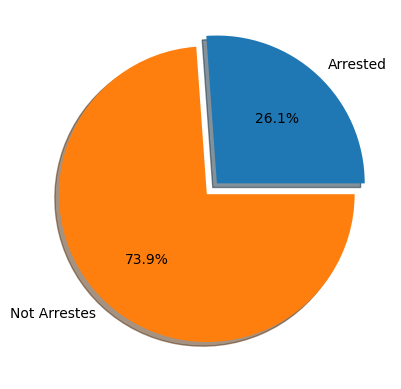

In [7]:
# % of arrest done by chicago police
val1,val2 = 0,0
def func(val):
    global val1,val2
    if val == True:
        val1+=1
    else:val2+=1
df_chicago["Arrest"].apply(func)

import matplotlib.pyplot as plt
plt.pie([val1,val2],labels = ["Arrested","Not Arrestes"],explode = [0.1,0],shadow = True,autopct="%1.1f%%")
plt.show()

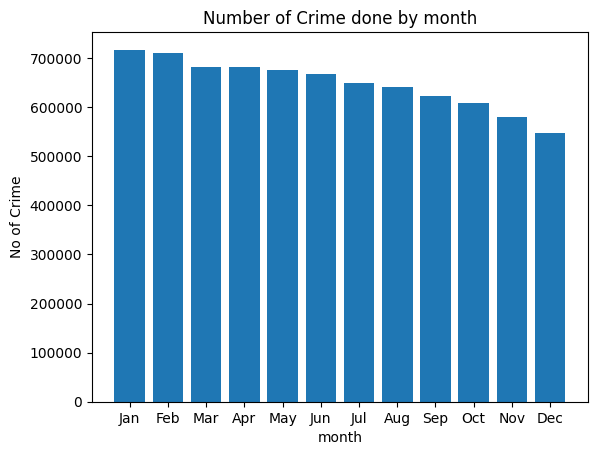

In [8]:
#Number of Crime by Month
df_chicago['Date'] = pd.to_datetime(df_chicago['Date'], format='%m/%d/%Y %I:%M:%S %p')
df_chicago['Month'] = df_chicago['Date'].dt.month
lst_count_month = list(df_chicago.Month.value_counts())
lst_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
import matplotlib.pyplot as plt
plt.bar(lst_month,lst_count_month)
plt.xlabel("month")
plt.ylabel("No of Crime")
plt.title("Number of Crime done by month")
plt.show()